<a href="https://colab.research.google.com/github/twyeh/university-physics/blob/main/%E7%AD%89%E9%80%9F%E7%8E%87%E5%9C%93%E5%91%A8%E9%81%8B%E5%8B%95%E5%AF%A6%E9%A9%97%E6%95%B8%E6%93%9A%E5%88%86%E6%9E%90(20231016)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 等速率圓周運動實驗：

**理論模型**：
假設有一質量為$m$的塑膠球，由一棉線將其繫住，接著讓棉線通過一根粗吸管後，將棉線綁住一個裝砂的塑膠筒，塑膠筒的質量為$M$。用手持吸管
並緩慢且穩定地畫圈式地搖動吸管，使塑膠球以半徑為$R$，速率為$v$(或運動週期為$T$)方式進行等速率圓周運動。
根據等速率圓周運動模型，塑膠球受到由棉線提供的向心力$F_c=ma_c$，其中向心加速率$a_c$與塑膠球的切線速率$v$及圓周半徑$R$成下列關係：$$a_c=\frac{v^2}{R}$$ 向心力$F_c$由棉線的張力提供，該張力等於砂筒的重量$Mg$($g$為重力加速度)。因此，有下列關係：$$Mg=m\frac{v^2}{R}$$因為$$v=\frac{2\pi R}{T}$$，所以得到$$M=(\frac{4\pi^2 m}{g})\frac{R}{T^2}$$此等式中，共有三個變數$M,R,T^2$。


---

實驗：$M=定值$，$T^2$為$R$的函數$$T^2=(\frac{4\pi^2 m}{Mg})R$$


載入繪圖程式庫 matplotlib.pyplot 及數據處理程式庫 numpy。為了找到適合的科學模型，還需要回歸分析工具庫 scipy.optimize 的 curve_fit 函數。

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

實驗：假設 $M=100g, m=5g, g=980cm/s^2$,改變$R=15cm, 20cm, 25cm, 30cm$測量$T$，然後計算$T^2$。實際實驗的控制相當不容易，為減少人為誤差，針對每一個$R$值，皆測量$10$次，然後計算其平均$\bar{R}$與平均標準誤差$\sigma_R$。

## 數據分析步驟

1.將上述實驗測量每次$T$值，
依序填入下列數據欄內yTdata　矩陣（其中 [[1,2,3,..],[4,5,6,..],...], 每個方括號[]表示一組數據）。


In [2]:
yTdata=[[0.18761663, 0.18947295, 0.18920888, 0.18248288, 0.17776389],
       [0.20542639, 0.20808652, 0.21702534, 0.20566964, 0.20099751],
       [0.24269322, 0.23600847, 0.24062419, 0.22803509, 0.23832751],
       [0.25039968, 0.26286879, 0.25573424, 0.26664583, 0.26324893]]


2.利用 numpy.square 計算 yTdata 的$T^2$數據，以得到 yT2data　矩陣。

In [3]:
yT2data=np.square(yTdata)

### 3.預備數據的計算:
使用 np.mean (平均值) 及 np.std (標準偏差) 計算 $(mean(T^2), error(T^2))$

In [4]:
y1data = [np.mean(yT2data[0]),np.mean(yT2data[1]),np.mean(yT2data[2]),np.mean(yT2data[3])]
y1error = [np.std(yT2data[0]),np.std(yT2data[1]),np.std(yT2data[2]),np.std(yT2data[3])]
y1data, y1error

([0.03436000019722806,
  0.04305999991203756,
  0.056260000410594715,
  0.06751999996221558],
 [0.0016668527451012955,
  0.0022258475410057246,
  0.002383777789075515,
  0.0030399995329118065])

4.輸入實驗數據 $(R, mean(T^2), error(T^2))$

In [5]:
xdata = [15, 20, 25, 30] # 旋轉半徑數據
ydata = y1data #對應每一個半徑的週期平方數據10次的平均值
yerror = y1error #對應每一個週期平方實驗數據平均值的標準偏差


5.繪製原始數據圖，平均值及誤差。

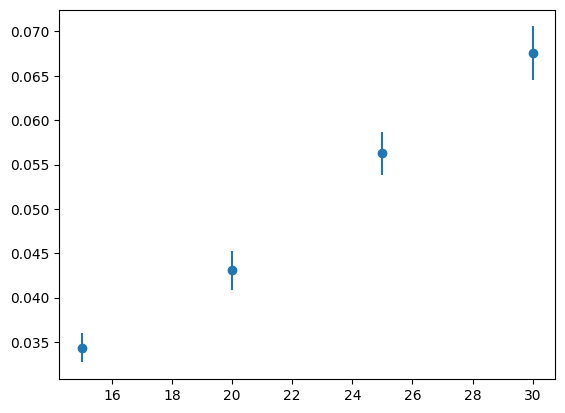

In [6]:
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
yerror = np.asarray(yerror)
plt.errorbar(xdata, ydata, yerr=yerror, xerr=0, fmt='none')
plt.plot(xdata, ydata, 'o')
plt.show()

6.為了理解實驗數據背後的數學模型，並與理論模型進行比較。利用最小方差法進行分析。假設模型為 $y=A_{\text{th}}x$，其中$y$表示$T^2$，$x$表示$R$，$$A_{\text{th}}=(\frac{4\pi^2 m}{Mg})$$。根據實驗條件：$m=5g, M=100g, g=980cm/s^2, \pi=3.14$，可計算出$A_{\text{th}}$的理論值約等於 $0.002$

7.因為要配合下面使用的函數：
 curve_fit(fun, xdata, ydata, sigama=ydata_error)
*   假設 fun　的形式為 yth = fun(xdata, parameters)。
*   函數 fun 的定義必須第一個參數為輸入 xdata,
*   第二個為需要計算參數 parameters，並作為輸出資料。
*   fun 根據定義的模型 $y=A*x$，
*   依序將 xdata 中的數據讀入後，計算其理論值 $y_i=A*x_i$，
*   第三個輸入 sigma=ydata_error, 其中 ydata_error為 ydata　的標準誤差。
*   計算 $\chi^2$ 函數
\begin{equation}
\chi^2=\sum_{i=1}^{N}\frac{(f(\text{xdata}_i)-\text{ydada}_i)^2}{\text{ydata_error}_i^2}
\end{equation}
的最小值，以得到函數中定義的模型參數 $A$。
*   計算輸出：parameters, covariance
*   parameters={A}:計算的參數的平均值
*   covariance={c_{ii}}：參數的變異值  

In [7]:
# Define the Model function
def Model(x, A):
    y = A*x
    return y

8.利用 curve_fit(fun, xdata, ydata) 函數根據計算數據的迴歸分析，回傳值為 parameters (決定的參數), covariance (誤差).

In [8]:
parameters, covariance = curve_fit(Model, xdata, ydata, sigma=yerror)

In [9]:
fit_A = parameters[0]
print(fit_A)

0.0022379996576021043


### 9.繪製實驗數據及擬合結果比較圖

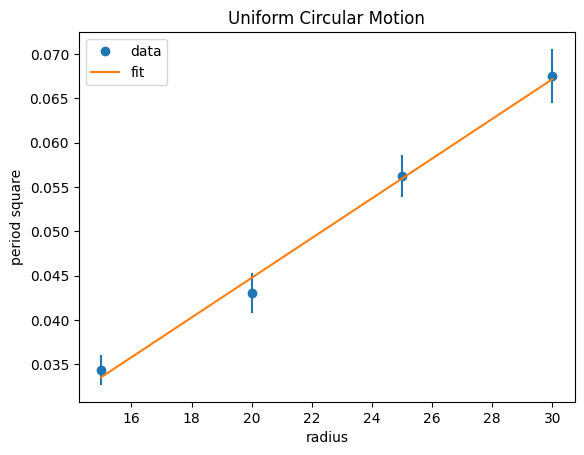

In [10]:
fit_y = Model(xdata, fit_A)
plt.errorbar(xdata, ydata, yerr=yerror, xerr=0, fmt='none')
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()
plt.xlabel("radius")
plt.ylabel("period square")
plt.title('Uniform Circular Motion')
plt.show()

10. 計算實驗擬合參數 $A_{\text{fit}}$ 與理論預測 $A_{\text{th}}$ 之間的誤差

In [11]:
th_A=0.002
Aerror=(fit_A-th_A)/th_A*100
print(F'The value of percentage error of {fit_A:.5f} vs {th_A:.5f} is {Aerror:.5f}%')

The value of percentage error of 0.00224 vs 0.00200 is 11.89998%


In [12]:
SE = np.sqrt(np.diag(covariance))
SE_A = SE[0]
print(F'The value of A is {fit_A:.5f} with standard error of {SE_A:.5f}.')

The value of A is 0.00224 with standard error of 0.00003.
